# SVM Kernel

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR  # for Support Vector Regressor algorithm
from sklearn.metrics import r2_score # to Check Accuracy
from sklearn.model_selection import GridSearchCV # For hyper parameter tuning
import plotly.express as px # for 3D plot
from sklearn.metrics import r2_score ,accuracy_score
from sklearn.svm import SVR

In [58]:
# creating complex data points
x = np.linspace(-5,5.0,100)
y = np.sqrt(10**2-x**2)
y= np.hstack([y,-y])
x = np.hstack([x,-x])
x1 = np.linspace(-5,5.0,100)
y1 = np.sqrt(5**2-x1**2)
y1= np.hstack([y1,-y1])
x1 = np.hstack([x1,-x1])

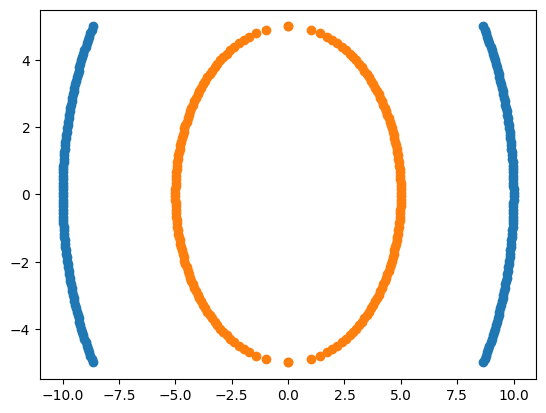

In [59]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [60]:
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = pd.concat(objs=[df1,df2])
df.head(5)

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [61]:
df.tail()

,X1,X2,Y
195,-1.969049,-4.59596,1
196,-1.714198,-4.69697,1
197,-1.406908,-4.79798,1
198,-0.999949,-4.89899,1
199,-0.000000,-5.00000,1


In [62]:
# making another features
df['X1_Square']=df['X1']**2
df['X2_Square']=df['X2']**2
df['X1*X2']=df['X1']*df['X2']
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [63]:
# Independent and dependent features
X = df.iloc[:,3:]
y = df['Y']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=33)

In [65]:
X_train.head()

,X1_Square,X2_Square,X1*X2
193,5.693297,19.306703,10.484216
81,89.876033,10.123967,30.164582
5,4.795429,20.204571,-9.843251
119,90.508622,9.491378,-29.309582
166,97.222222,2.777778,16.433555


## Visualizing 3D data

In [66]:
plt.figure(figsize=(20,10))
fig = px.scatter_3d(data_frame=df,x='X1_Square',y='X2_Square',z = 'X1*X2',color='Y')
fig

<Figure size 2000x1000 with 0 Axes>

In [67]:
# doing prediction and checking accuracy score
svr = SVR(kernel='linear')
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [69]:
y_pred = svr.predict(X_test)
print(r2_score(y_test,y_pred))
print(1-(1-r2_score(y_test,y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))


0.9832068924614733
0.9826821078508944


## Above I have used poly nomial kernel

### Radial Basis Function kernel

In [71]:
## dependent and Independet features
X1 = df.iloc[:,0:2]
y1= df['Y']

In [78]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
     X1, y1, test_size=0.25, random_state=0)

In [79]:
X_train1

,X1,X2
50,4.999745,0.050505
63,9.906589,1.363636
112,-3.263736,3.787879
159,-9.953852,-0.959596
83,3.680983,3.383838
...,...,...
123,-4.223140,2.676768
192,-9.031653,-4.292929
117,-9.445795,3.282828
47,9.996811,-0.252525


In [80]:
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train1,y_train1)

SVR()

In [83]:
y_pred_rbf = svr_rbf.predict(X_test1)
print(r2_score(y_test1,y_pred_rbf))
# accuracy_score(y_test1,y_pred_rbf)

0.9631995830238786


## Sigmoid Kernel

In [86]:
svr_sigmoid = SVR(kernel='sigmoid')
svr_sigmoid.fit(X_train1,y_train1)

SVR(kernel='sigmoid')

In [88]:
y_pred_sigmoid = svr_sigmoid.predict(X_test1)
print(r2_score(y_test1,y_pred_sigmoid))
# accuracy_score(y_test1,y_pred_rbf)
print('this is not for my dataset')

-236.0644944667713
this is not made for my dataset
